# Neural Networks
This question is to show a basic understanding of neural networks by implementing a multilayer perceptron (MLP) model in PyTorch to classify handwritten digits from the Digits dataset. The dataset contains 1,797 images of handwritten digits, each image being an 8x8 pixel grayscale image of a digit (0-9). Each image is represented as a 64-feature input vector, corresponding to the grayscale values of the pixels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy.random as rng
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score

/Users/izzysouthon/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data loading and preprocessing 

In [2]:
# Load the digits dataset
digits = load_digits()

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=231)

In [4]:
print(X_train.shape) # in the training set there are 1437 samples (images), 64 features (pixels in each image)
print(y_train.shape)

(1437, 64)
(1437,)


In [5]:
# Normalize the images by scaling the pixel values to a range of 0 to 1
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [6]:
# Convert the datasets into PyTorch tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [7]:
# Create DataLoader objects for both training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
np.random.seed(231)

## (a) 
Define a neural network class by extending torch.nn.Module. The network should have one input layer, one hidden layer with 128 neurons, and one output layer. Use the ReLU activation function for the hidden layer, and the softmax activation function for the output layer. Determine the number of neurons in the input and output layers and justify your answer. Implement your neural network class accordingly. 

In [9]:
import torch.nn.functional as F
import torch.nn as nn

In [10]:
# Defines a custom NN called CustomNet, utilises torch.nn.Module
class CustomNet(torch.nn.Module):
    
    # Constructor method where layers are initialized of the NN
    def __init__(self): 
        
        #  Initialize the parent class
        super().__init__() 
        
        # Define the layers
        self.layer1 = torch.nn.Linear(64, 128) # First layer of NN: Input layer with 64 neurons, output 128 neurons
        self.layer2 = torch.nn.Linear(128, 10)  # Second layer of NN: Takes 128 neurons from prior layer, outputting 10 neurons (classes)
    
    # Defines the forward pass of the NN, where x is passed through the network to generate the output
    def forward(self, x): 
        
        # Forward pass through the network
        # The input x is passed through the first layer which performs linear transformation
        x = self.layer1(x) 
        
        # The output of the first layer is passed through the second layer 
        # The ReLU activation function is applied to the output of this layer
        x = F.relu(self.layer2(x)) 
        
        # Output of the network is returned
        return x 

The number of neurons in the input layer is 64 because each image in the Digits dataset is represented as a 64 feature input vector (8x8 pixels). The hidden layer has 128 neurons, outputting 10 neurons corresponding to the 10 classes (digits 0-9) that the image could correspond to. 

## (b) 
Use the torch.nn.CrossEntropyLoss for your loss function, choose an optimizer from torch.optim.SGD and torch.optim.Adam and set an appropriate learning rate, provide justifications for your choices. Train the model for 15 epochs. After each epoch, print the training loss and accuracy.

In [11]:
# Setting random seed for reproducibility 
torch.manual_seed(231)

# Initialize the model
model = CustomNet()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 15
lossHistory = [] # An empty list to store the loss values after each epoch
accuHistory = [] # An empty list to store the accuracy values after each 

# The outer loop iterates over the number of epochs 
for t in range(epochs):
    
    # Clears old gradients from the last step (gradients accumulate by default)
    optimizer.zero_grad()  
    
    # The inner loop iterates over the batches of training data provided by train_loader
    # batch_x contains the input data, and batch_y contains the corresponding labels
    for batch_x, batch_y in train_loader:
        
        # Forward pass: batch_x is passed through the model to get the output predictions
        output = model(batch_x)
        
        # Loss calculation: the loss is calculated by comparing the model's output with the true labels batch_y using the defined loss function
        loss = criterion(output, batch_y)
        
        # Backward pass: computes the gradient of the loss with respect to the model parameters 
        loss.backward()
        
        # Take a step: the optimizer updates the model parameters based on the computed gradients
        optimizer.step()

    # Accuracy calculation (after the last batch of the epoch)
    # The accuracy is calculated by comparing the predicted labels with the true labels batch_y
    # The mean of the resulting tensor of booleans (converted to floats) gives the accuracy
    accuracy = torch.mean((torch.argmax(output, dim=1) == batch_y).float())
    
    # The loss value is appended to lossHistory. 
    # detach() is used to remove the gradient information, and item() converts the tensor to a Python scalar
    lossHistory.append(loss.detach().item())
    
    # The accuracy value is appended to accuHistory (the empty list from earlier)
    accuHistory.append(accuracy.detach())
    
    print(f"Epoch {t+1}: Loss = {lossHistory[-1]:.3f}, Accuracy = {accuHistory[-1]*100:.2f}%")

Epoch 1: Loss = 1.859, Accuracy = 65.52%
Epoch 2: Loss = 1.705, Accuracy = 65.52%
Epoch 3: Loss = 1.325, Accuracy = 62.07%
Epoch 4: Loss = 0.919, Accuracy = 79.31%
Epoch 5: Loss = 0.941, Accuracy = 75.86%
Epoch 6: Loss = 0.571, Accuracy = 93.10%
Epoch 7: Loss = 0.422, Accuracy = 82.76%
Epoch 8: Loss = 0.504, Accuracy = 86.21%
Epoch 9: Loss = 0.347, Accuracy = 93.10%
Epoch 10: Loss = 0.327, Accuracy = 89.66%
Epoch 11: Loss = 0.383, Accuracy = 93.10%
Epoch 12: Loss = 0.315, Accuracy = 93.10%
Epoch 13: Loss = 0.089, Accuracy = 100.00%
Epoch 14: Loss = 0.305, Accuracy = 89.66%
Epoch 15: Loss = 0.207, Accuracy = 93.10%


## (c) 
After training, evaluate the model on the test set to measure its accuracy. Print the test accuracy and show five example predictions along with their actual labels. 

In [12]:
# Set the model to evaluation mode
model.eval()

# Variables to store accuracy and predictions
test_correct = 0 # A counter to keep track of the number of correct predictions
test_total = 0 # A counter to keep track of the total number of predictions
example_predictions = [] # A list to store some example predictions and their corresponding actual labels for later display

# Iterate through the test set
# This context manager disables gradient computation, it reduces memory usage and speeds up computation
with torch.no_grad():
    
    # This loop iterates over the batches of test data provided by test_loader
    # inputs contains the test data
    # labels contains the true labels.
    for inputs, labels in test_loader:
        
        # The test data inputs are passed through the model to get the output predictions
        outputs = model(inputs) 
        
        # The torch.max function returns the maximum value and its index along a specified dimension
        # 1 indicates we want the index of the maximum value along the dimension corresponding 
        # to the output classes
        # 'predicted' will contain the predicted class labels.
        _, predicted = torch.max(outputs, 1)
        
        # This calculates the number of correct predictions by comparing predicted with labels
        # and sums the number of matches. 
        # .item() converts the result from a tensor to a Python scalar.
        test_correct += (predicted == labels).sum().item() # The number of correct predictions in the current batch
        test_total += labels.size(0) # The total number of labels in the current batch.
        
        # Store example predictions and actual labels
        # Loop stores up to 5 example predictions and their actual labels from the current batch
        for i in range(min(5, labels.size(0))):
            example_predictions.append((predicted[i].item(), labels[i].item()))

# Calculate test accuracy
test_accuracy = test_correct / test_total # Ratio of correct predictions to the total number of predictions

# Print test accuracy
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Show five example predictions along with their actual labels
for i, (prediction, actual) in enumerate(example_predictions[:5]):
    print(f'Test Image {i+1}: Predicted Label = {prediction}, Actual Label = {actual}')

    
# += is a faster way of doing test_correct = test_correct + predicted...
# enumerate keeps track of the index i
# _, predicted ignores the max values (assigned to _) 
#and only the indices (which represent the predicted class labels) are stored in predicted

Test Accuracy: 91.67%
Test Image 1: Predicted Label = 4, Actual Label = 4
Test Image 2: Predicted Label = 5, Actual Label = 5
Test Image 3: Predicted Label = 1, Actual Label = 1
Test Image 4: Predicted Label = 4, Actual Label = 4
Test Image 5: Predicted Label = 2, Actual Label = 1


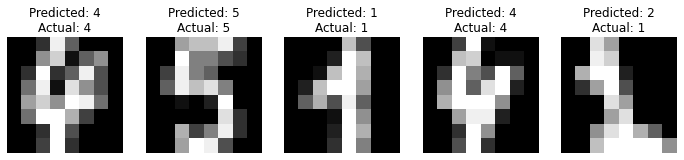

In [13]:
plt.figure(figsize=(12, 3))

# Show five example predictions along with their actual labels
# Iterates over the first five example predictions, with i as the index
for i, (prediction, actual) in enumerate(example_predictions[:5]): 
    
    # Extracts the i-th test image from X_test and reshapes it to 8x8 pixels
    image = X_test[i].reshape(8,8)
    
    # Creates a subplot in a 1x5 grid and places the current image in the (i+1)th position
    plt.subplot(1, 5, i+1)
    
    # Displays the image in grayscale.
    plt.imshow(image, cmap='gray') 
    
    # Adding a title to plots with predicted vs actual values
    plt.title(f'Predicted: {prediction}\nActual: {actual}')
    
    plt.axis('off')

plt.show()

## Sigmoid activation function 

In [14]:
class CustomNet2(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        # Define the layers
        self.layer1 = torch.nn.Linear(64, 128) 
        self.layer2 = torch.nn.Linear(128, 10) 
        
    def forward(self, x): 
        x = self.layer1(x) 
        x = torch.sigmoid(self.layer2(x)) 
        return x 

In [15]:
torch.manual_seed(231)

# Initialize the model
model = CustomNet2()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 15
lossHistory = []
accuHistory = []

for t in range(epochs):
    optimizer.zero_grad()  

    for batch_x, batch_y in train_loader:
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

    accuracy = torch.mean((torch.argmax(output, dim=1) == batch_y).float())
    lossHistory.append(loss.detach().item())
    accuHistory.append(accuracy.detach())
    
    print(f"Epoch {t+1}: Loss = {lossHistory[-1]:.3f}, Accuracy = {accuHistory[-1]*100:.2f}%")

Epoch 1: Loss = 2.166, Accuracy = 62.07%
Epoch 2: Loss = 2.066, Accuracy = 68.97%
Epoch 3: Loss = 1.903, Accuracy = 82.76%
Epoch 4: Loss = 1.826, Accuracy = 79.31%
Epoch 5: Loss = 1.777, Accuracy = 86.21%
Epoch 6: Loss = 1.719, Accuracy = 89.66%
Epoch 7: Loss = 1.734, Accuracy = 75.86%
Epoch 8: Loss = 1.664, Accuracy = 89.66%
Epoch 9: Loss = 1.637, Accuracy = 93.10%
Epoch 10: Loss = 1.627, Accuracy = 89.66%
Epoch 11: Loss = 1.632, Accuracy = 93.10%
Epoch 12: Loss = 1.639, Accuracy = 79.31%
Epoch 13: Loss = 1.571, Accuracy = 100.00%
Epoch 14: Loss = 1.595, Accuracy = 89.66%
Epoch 15: Loss = 1.589, Accuracy = 93.10%


In [16]:
# Set the model to evaluation mode
model.eval()

# Variables to store accuracy and predictions
test_correct = 0
test_total = 0
example_predictions = []

# Iterate through the test set
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)
        
        # Store example predictions and actual labels
        for i in range(min(5, labels.size(0))):
            example_predictions.append((predicted[i].item(), labels[i].item()))

# Calculate test accuracy
test_accuracy = test_correct / test_total

# Print test accuracy
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Show five example predictions along with their actual labels
for i, (prediction, actual) in enumerate(example_predictions[:5]):
    print(f'Test Image {i+1}: Predicted Label = {prediction}, Actual Label = {actual}')

Test Accuracy: 91.94%
Test Image 1: Predicted Label = 4, Actual Label = 4
Test Image 2: Predicted Label = 5, Actual Label = 5
Test Image 3: Predicted Label = 1, Actual Label = 1
Test Image 4: Predicted Label = 4, Actual Label = 4
Test Image 5: Predicted Label = 2, Actual Label = 1


## Tanh activation function 

In [17]:
class CustomNet3(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        # Define the layers
        self.layer1 = torch.nn.Linear(64, 128) 
        self.layer2 = torch.nn.Linear(128, 10) 
        
    def forward(self, x): 
        x = self.layer1(x) 
        x = torch.tanh(self.layer2(x)) 
        return x 

In [18]:
torch.manual_seed(231)

# Initialize the model
model = CustomNet3()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 15
lossHistory = []
accuHistory = []

for t in range(epochs):
    optimizer.zero_grad()  

    for batch_x, batch_y in train_loader:
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

    accuracy = torch.mean((torch.argmax(output, dim=1) == batch_y).float())
    lossHistory.append(loss.detach().item())
    accuHistory.append(accuracy.detach())
    
    print(f"Epoch {t+1}: Loss = {lossHistory[-1]:.3f}, Accuracy = {accuHistory[-1]*100:.2f}%")

Epoch 1: Loss = 1.816, Accuracy = 79.31%
Epoch 2: Loss = 1.645, Accuracy = 75.86%
Epoch 3: Loss = 1.608, Accuracy = 58.62%
Epoch 4: Loss = 1.267, Accuracy = 86.21%
Epoch 5: Loss = 1.349, Accuracy = 75.86%
Epoch 6: Loss = 1.280, Accuracy = 82.76%
Epoch 7: Loss = 1.189, Accuracy = 79.31%
Epoch 8: Loss = 1.194, Accuracy = 82.76%
Epoch 9: Loss = 1.125, Accuracy = 89.66%
Epoch 10: Loss = 1.055, Accuracy = 96.55%
Epoch 11: Loss = 1.094, Accuracy = 89.66%
Epoch 12: Loss = 1.111, Accuracy = 79.31%
Epoch 13: Loss = 1.004, Accuracy = 96.55%
Epoch 14: Loss = 1.041, Accuracy = 89.66%
Epoch 15: Loss = 1.001, Accuracy = 96.55%


In [19]:
# Set the model to evaluation mode
model.eval()

# Variables to store accuracy and predictions
test_correct = 0
test_total = 0
example_predictions = []

# Iterate through the test set
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)
        
        # Store example predictions and actual labels
        for i in range(min(5, labels.size(0))):
            example_predictions.append((predicted[i].item(), labels[i].item()))

# Calculate test accuracy
test_accuracy = test_correct / test_total

# Print test accuracy
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Show five example predictions along with their actual labels
for i, (prediction, actual) in enumerate(example_predictions[:5]):
    print(f'Test Image {i+1}: Predicted Label = {prediction}, Actual Label = {actual}')

Test Accuracy: 91.67%
Test Image 1: Predicted Label = 7, Actual Label = 4
Test Image 2: Predicted Label = 5, Actual Label = 5
Test Image 3: Predicted Label = 1, Actual Label = 1
Test Image 4: Predicted Label = 4, Actual Label = 4
Test Image 5: Predicted Label = 2, Actual Label = 1
